In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

In [18]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [19]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [21]:
#checking for null values
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [22]:
#so we have 177 null values in Age column we have to fill them first
df['Age'].fillna(df['Age'].mean(),inplace=True)

C:\Users\Waqas\AppData\Local\Temp\ipykernel_4116\1905139793.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)


In [24]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [25]:
#spiliting the data into x and y
x = df.drop('Survived',axis=1)
y = df['Survived']

In [26]:
x.head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [27]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

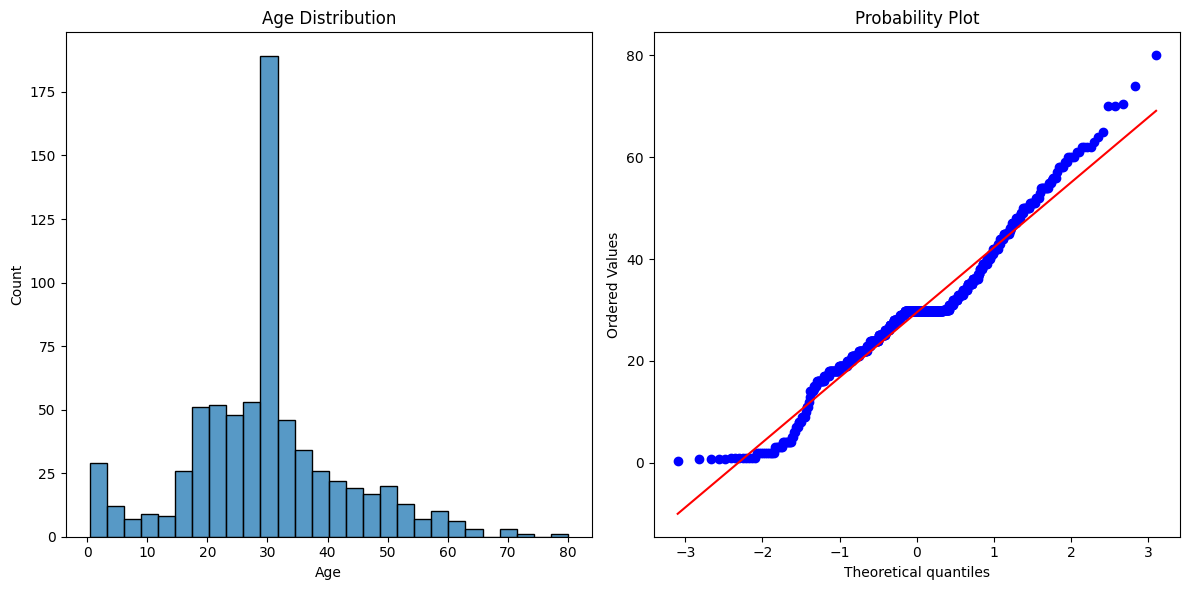

In [37]:
#plotting the distribution of Age
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.histplot(x_train['Age'])
plt.title('Age Distribution')

plt.subplot(122)
stats.probplot(x_train['Age'],dist='norm',plot=plt)
plt.title('Probability Plot')

plt.tight_layout()
plt.show()

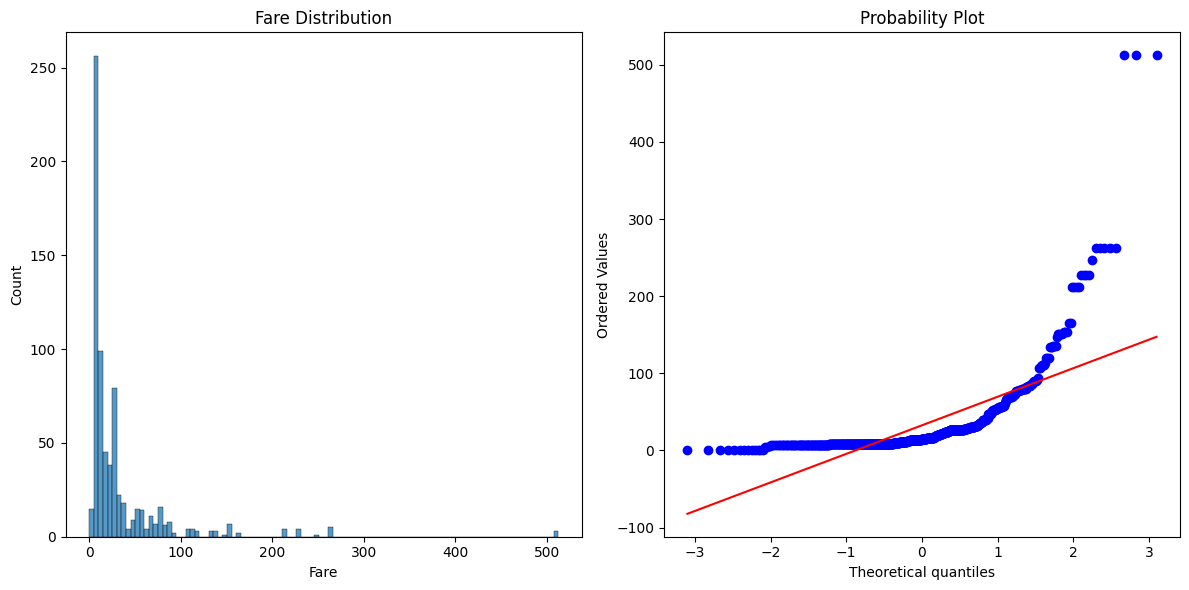

In [38]:
#plotting the distribution of Fare
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.histplot(x_train['Fare'])
plt.title('Fare Distribution')

plt.subplot(122)
stats.probplot(x_train['Fare'],dist='norm',plot=plt)
plt.title('Probability Plot')

plt.tight_layout()
plt.show()

In [39]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [40]:
#fitting the model without using FunctionTransformer
clf.fit(x_train,y_train)
clf2.fit(x_train,y_train)

y_pred = clf.predict(x_test)
y_pred2 = clf2.predict(x_test)

print('Accuracy of Logistic Regression:',accuracy_score(y_test,y_pred))
print('Accuracy of Decision Tree:',accuracy_score(y_test,y_pred2))

Accuracy of Logistic Regression: 0.6480446927374302
Accuracy of Decision Tree: 0.659217877094972


In [41]:
#creating an instance of FunctionTransformer
trf = FunctionTransformer(np.log1p)

In [42]:
x_train_transformed = trf.fit_transform(x_train)
x_test_transformed = trf.transform(x_test)

In [43]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

#fitting the model using FunctionTransformer
clf.fit(x_train_transformed,y_train)
clf2.fit(x_train_transformed,y_train)

y_pred = clf.predict(x_test_transformed)
y_pred2 = clf2.predict(x_test_transformed)

print('Accuracy of Logistic Regression:',accuracy_score(y_test,y_pred))
print('Accuracy of Decision Tree:',accuracy_score(y_test,y_pred2))

Accuracy of Logistic Regression: 0.6815642458100558
Accuracy of Decision Tree: 0.6759776536312849


In [ ]:
#ist cross validation
x_transformed = trf.fit_transform(x)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",cross_val_score(clf,x_transformed,y,scoring="accuracy",cv=10).mean())
print("DT",cross_val_score(clf2,x_transformed,y,scoring="accuracy",cv=10).mean())


LR 0.678027465667915
DT 0.6577652933832709


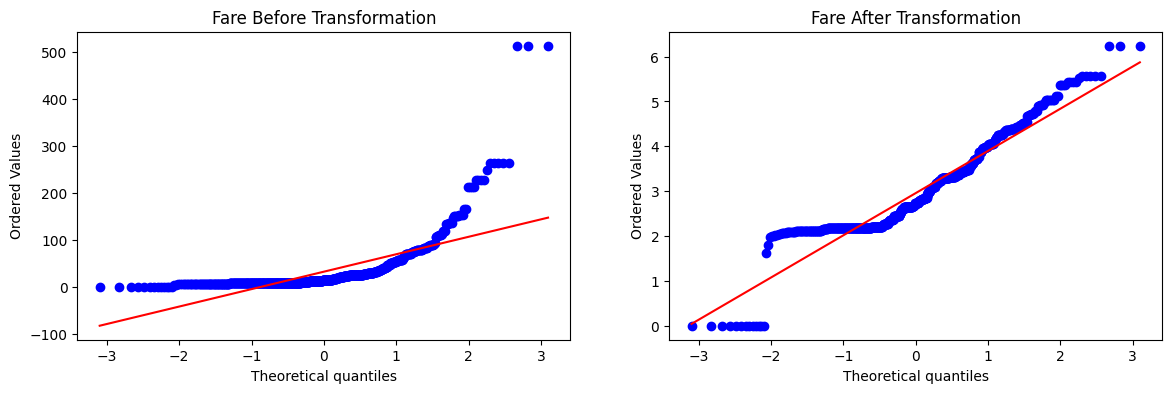

In [49]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(x_train['Fare'],dist='norm',plot=plt)
plt.title('Fare Before Transformation')

plt.subplot(122)
stats.probplot(x_train_transformed['Fare'],dist='norm',plot=plt)
plt.title('Fare After Transformation')

plt.show()

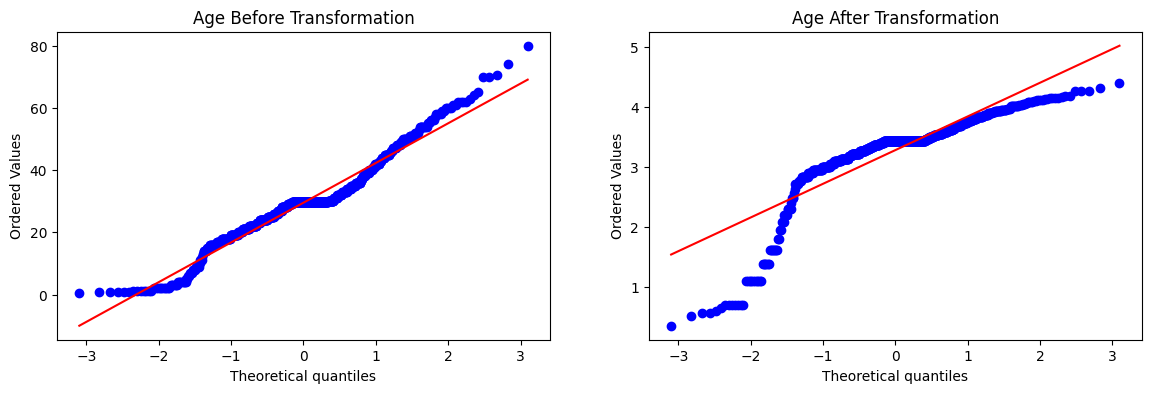

In [48]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(x_train['Age'],dist='norm',plot=plt)
plt.title('Age Before Transformation')

plt.subplot(122)
stats.probplot(x_train_transformed['Age'],dist='norm',plot=plt)
plt.title('Age After Transformation')

plt.show()

In [50]:
#transforming the fare column only
trf2 = ColumnTransformer(transformers=[('log1p',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

x_train_transformed = trf2.fit_transform(x_train)
x_test_transformed = trf2.transform(x_test)

In [51]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(x_train_transformed,y_train)
clf2.fit(x_train_transformed,y_train)

y_pred = clf.predict(x_test_transformed)
y_pred2 = clf2.predict(x_test_transformed)

print('Accuracy of Logistic Regression:',accuracy_score(y_test,y_pred))
print('Accuracy of Decision Tree:',accuracy_score(y_test,y_pred2))

Accuracy of Logistic Regression: 0.6703910614525139
Accuracy of Decision Tree: 0.6759776536312849


In [52]:
#2nd cross validation
x_transformed2 = trf2.fit_transform(x)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",cross_val_score(clf,x_transformed2,y,scoring="accuracy",cv=10).mean())
print("DT",cross_val_score(clf2,x_transformed2,y,scoring="accuracy",cv=10).mean())

LR 0.6712609238451936
DT 0.6633333333333333


In [62]:
#custom transformation
def apply_transform(transform):
    x = df.iloc[:, 1:3]
    y = df.iloc[:,0]

    trf = ColumnTransformer(transformers=[('log1p',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    x_trans = trf.fit_transform(x)

    clf = LogisticRegression()

    print("Accuracy",cross_val_score(clf,x_trans,y,scoring="accuracy",cv=10).mean())

    plt.figure(figsize=(14,4))
    plt.subplot(121)
    stats.probplot(x['Fare'],dist='norm',plot=plt)
    plt.title('Fare Before Transformation')

    plt.subplot(122)
    stats.probplot(x_trans[:,0],dist='norm',plot=plt)
    plt.title('Fare After Transformation')

    plt.show()

Accuracy 0.6431335830212235


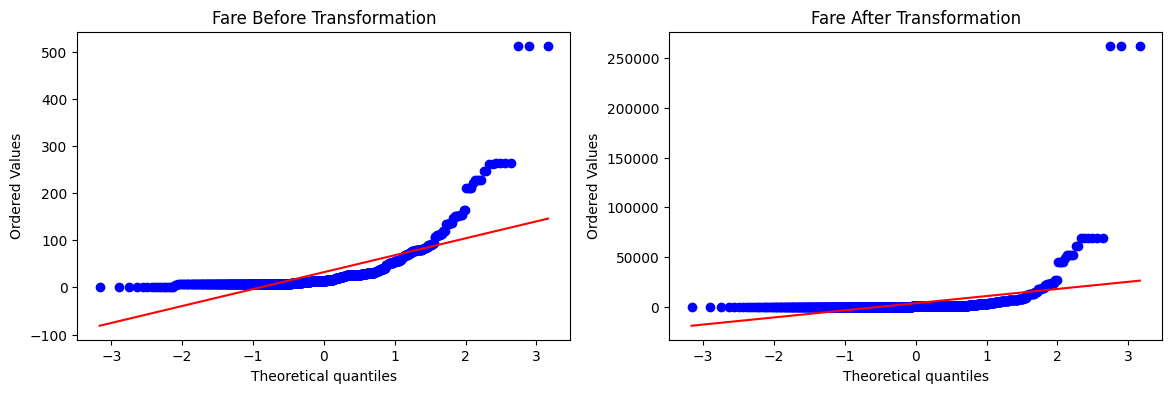

In [63]:
#checking for square transformation
apply_transform(lambda x: x**2)

